# **Pendidikan (Students Performance in Exams)**
**Sumber Dataset**

https://www.kaggle.com/datasets/spscientist/students-performance-in-exams



*   **Nama:** Maylina Nur'aini
*   **Email:** maylinanuraini@gmail.com
*   **ID Dicoding:** MC444D5X0679



# **Import Library**

In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import  OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

## **Data Loading**

In [2]:
# Upload fie json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maylina","key":"e9ca0dbfe70dd2a9da24aa79c607f1b9"}'}

In [3]:
# Setup Api key
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#Download dataset dari Kaggle
!kaggle datasets download -d spscientist/students-performance-in-exams

# Unzip file dataset
!unzip students-performance-in-exams.zip

Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
License(s): unknown
  0% 0.00/8.70k [00:00<?, ?B/s]
100% 8.70k/8.70k [00:00<00:00, 37.0MB/s]
Archive:  students-performance-in-exams.zip
  inflating: StudentsPerformance.csv  


In [4]:
# Membaca file csv
df = pd.read_csv("StudentsPerformance.csv")

# Menampilkan 5 baris pertama
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Pada Data loading ini, file kaggle.json yang berisi kunci API Kaggle diunggah untuk melakukan autentikasi. Kunci ini kemudian dipindahkan ke direktori khusus agar sistem dapat mengenali dan mengizinkan akses ke Kaggle melalui API. Setelah proses autentikasi berhasil, dataset bernama students-performance-in-exams diunduh menggunakan perintah API Kaggle. File dataset yang biasanya berupa arsip ZIP kemudian diekstrak untuk mendapatkan file CSV yang berisi data. Selanjutnya, file CSV tersebut dibaca menggunakan pustaka pandas ke dalam sebuah DataFrame. Untuk mendapatkan gambaran awal mengenai isi dataset, lima baris pertama dari DataFrame tersebut ditampilkan menggunakan fungsi head(). Langkah ini memudahkan dalam memahami struktur dan tipe data sebelum melanjutkan ke proses analisis lebih lanjut.

# **Data Understanding**

In [5]:
# Menampilkan informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# Menampilkan statistik deskriptif untuk kolom numerik
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
# Menampilkan jumlah baris dan kolom dalam bentuk tuple
df.shape

(1000, 8)

In [8]:
# Menampilkan jumlah nilai unik di setiap kolomnya
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [9]:
# Menampilkan missing values
df.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [10]:
# Menampilkan data duplikat
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


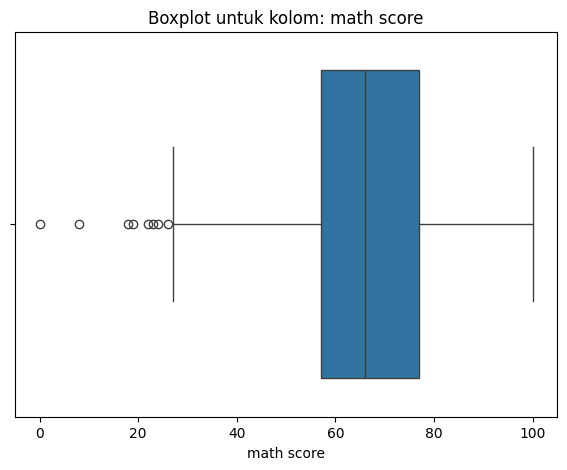

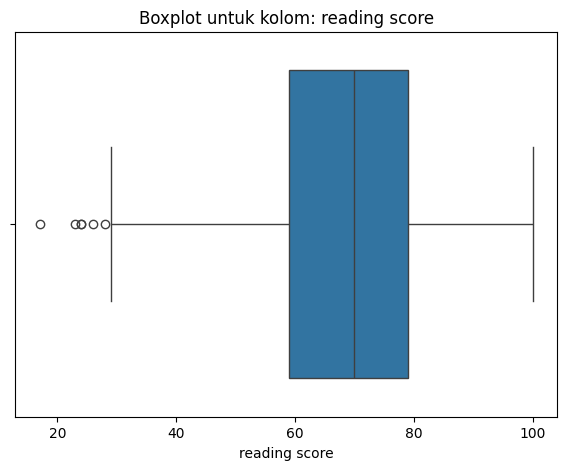

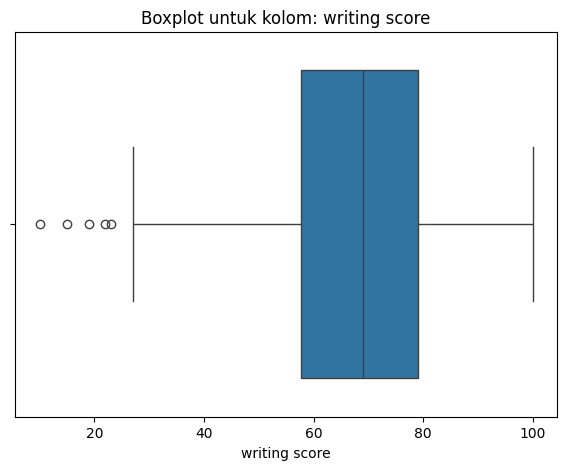

In [11]:
# Memilih hanya kolom numerik
df_outlier = df.select_dtypes(exclude=['object'])

# Membuat boxplot untuk setiap kolom numerik
for column in df_outlier:
    plt.figure(figsize=(7, 5))
    sns.boxplot(data=df_outlier, x=column)
    plt.title(f'Boxplot untuk kolom: {column}')
    plt.show()

- Pada proses Data Understanding ini, meliputi pengecekan informasi umum menggunakan df.info(), statistik deskriptif dengan df.describe(), dan melihat ukuran data lewat df.shape. Jumlah nilai unik diperiksa dengan df.nunique(), sementara df.isna().sum() dan df.duplicated().sum() digunakan untuk mendeteksi missing values dan data duplikat. Untuk mengenali outlier, dibuat boxplot pada kolom numerik yang menunjukkan data ekstrem di luar rentang interkuartil. Semua langkah ini penting untuk menilai kualitas data sebelum analisis lebih lanjut.
- Dari hasil analisi menunjukkan tidak terdapat 0 duplikasi dalam datasetnya. Selain itu juga terdeteksi outlier di kolom math score, reading score, dan writing score yang perlu untuk ditangani sebelum di analisis lebih lanjut.


# **Exploratory Data Analysis (EDA)**

## **EDA - Univariate Analysis**

Pada tahap ini Univariate Analysis, dilakukan analisis distribusi fitur kategorikal ('gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course') dengan hitung jumlah dan presentase kategori, dan juga divisualisasikan dengan diagram batang. Untuk fitur numerik (math score, reading score, dan writing score) distribusi data divisualisasikan dengan histrogram.

**Fitur Kategorikal**

        jumlah sampel  persentase
gender                           
female            518        51.8
male              482        48.2


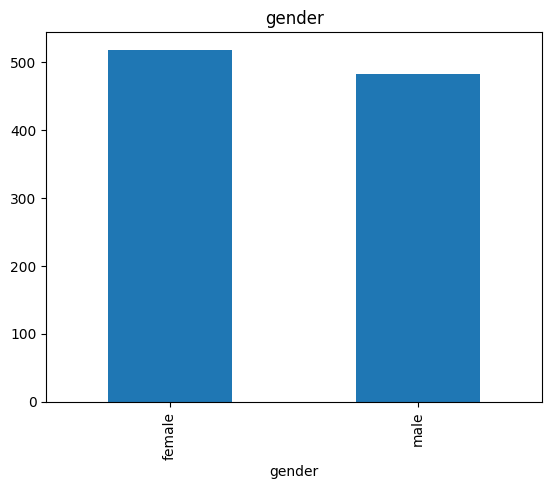

In [12]:
# Menentukan fitur kategorikal
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Analisis distribusi data untuk fitur kategorikal
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_baru = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})

# Menampilkan hasil dalam bentuk tabel
print(df_baru)

# Visualisasi distribusi kategori
count.plot(kind='bar', title=feature);

- Distribusi fitur kategorikal ini menunjukkan female (51,8%) dan male (48,2)
- Female lebih dominan dibandingkan dengan male.

**Fitur Numerik**

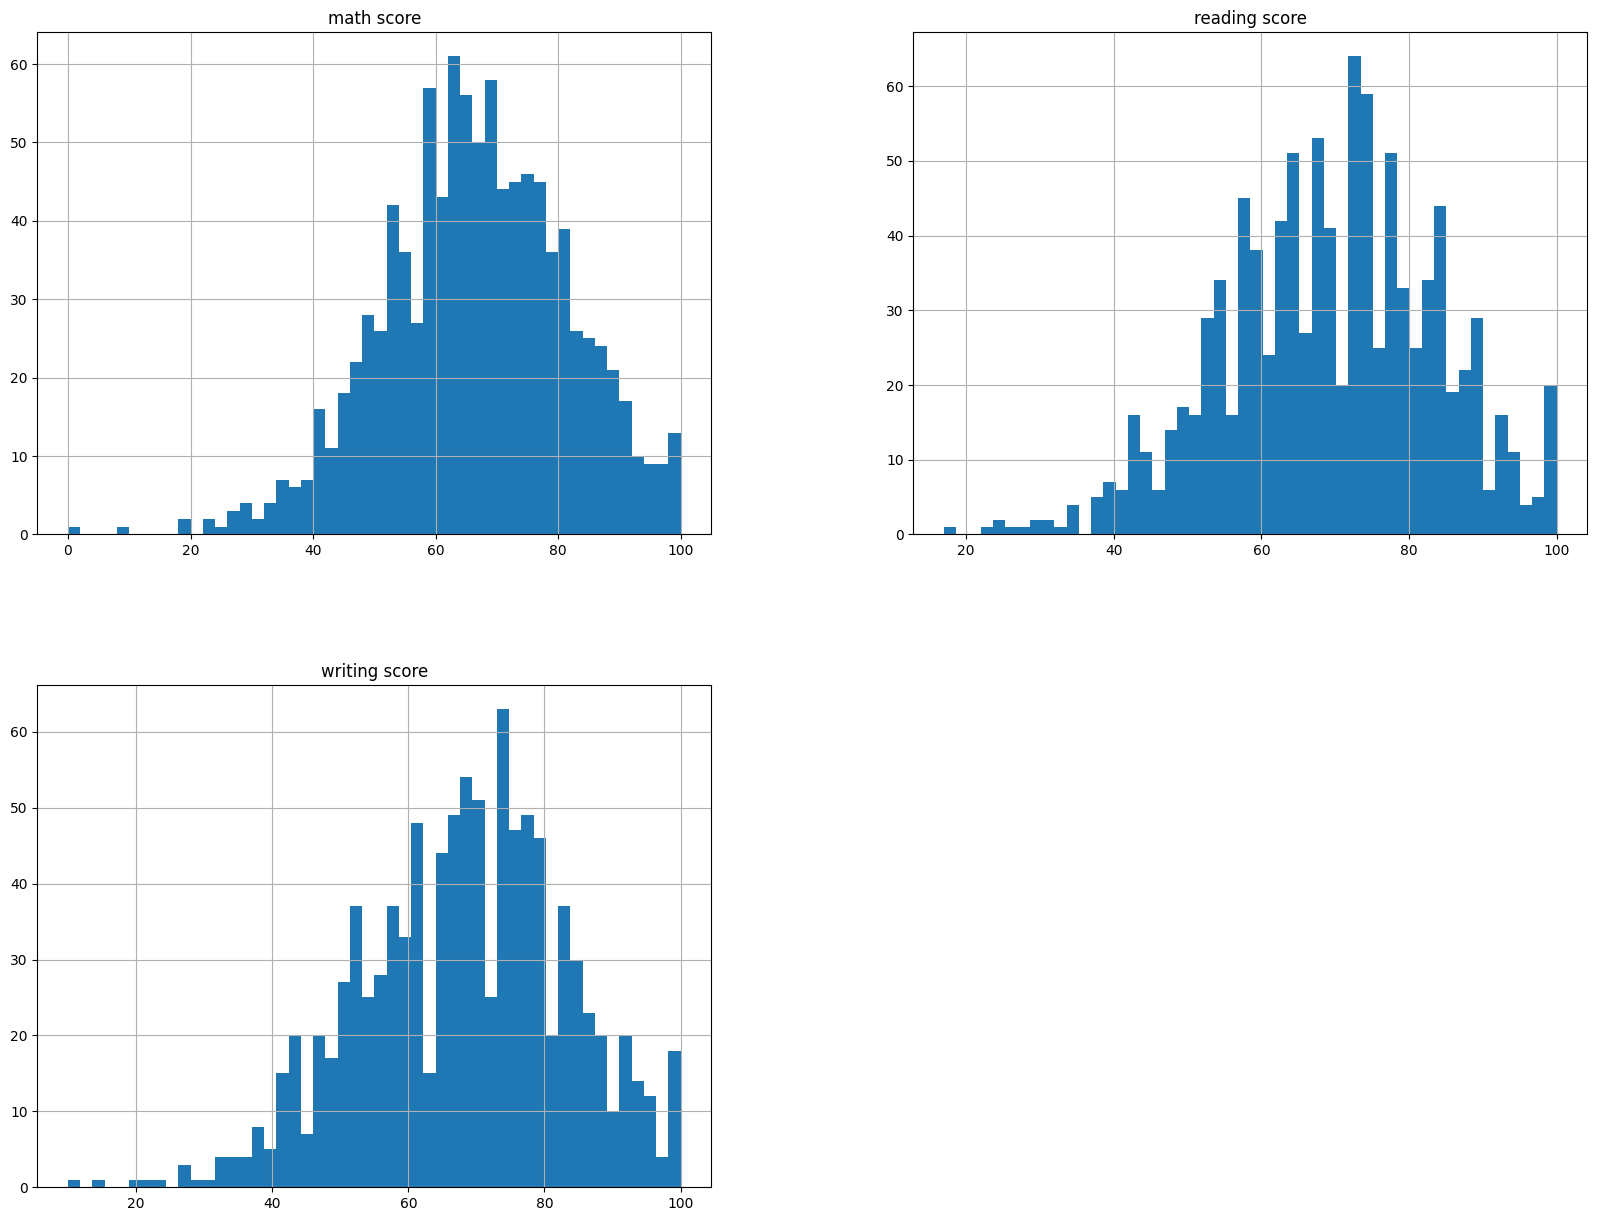

In [13]:
# Menentukan fitur numerik
numerical_features = ['math score', 'reading score', 'writing score']

# Menampilkan histogram data yang sudah dibersihkan
df.hist(bins=50, figsize=(20,15))
plt.show()

- math score: Distribusi cenderung normal, puncaknya di sekitar nilai tengah. Ada beberapa siswa dengan skor rendah.
- reading score: Distribusi juga cenderung normal, dengan puncak di sekitar nilai tengah. Terlihat lebih sedikit siswa dengan skor sangat rendah dibandingkan math score.
- writing score: Distribusi mirip dengan reading score, cenderung normal dengan puncak di sekitar nilai tengah.

## **EDA - Multivariate Analysis**

Pada tahap ini Multivariate Analysis, melakukan eksplorasi hubungan antar beberapa fitur dalam dataset secara bersamaan. Tujuannya adalah untuk mengidentifikasi pola atau keterkaitan antara variabel-variabel yang berbeda.

- Analisis Hubungan Fitur Kategorikal dengan Fitur Numerik (Contoh: Gender dan Math Score)
  - Menganalisis bagaimana rata-rata skor pada fitur numerik (math score) bervariasi di antara kategori-kategori dalam fitur kategorikal (gender). Visualisasi ini menggunakan diagram batang (bar plot) untuk membandingkan rata-rata skor antar kelompok.
- Analisis Interaksi Antar Fitur Numerik (Math Score, Reading Score, Writing Score)
  - Untuk memahami hubungan antar fitur numerik (math score, reading score, dan writing score), menggunakan pairplot. Pairplot menampilkan scatter plot untuk setiap kombinasi pasangan fitur numerik, serta histogram untuk distribusi setiap fitur numerik secara individual. Visualisasi ini membantu melihat pola sebaran data dan potensi hubungan antar variabel.
- Matriks Korelasi dan Visualisasi dengan Heatmap
  - Menghitung matriks korelasi antar fitur numerik (math score, reading score, dan writing score). Matriks korelasi menunjukkan kekuatan dan arah hubungan linier antar pasangan variabel. Hasil perhitungan ini akan divisualisasikan menggunakan heatmap, di mana warna sel menunjukkan besarnya koefisien korelasi. Heatmap memudahkan identifikasi fitur-fitur yang memiliki korelasi kuat, baik positif maupun negatif.

**Categorical Features**

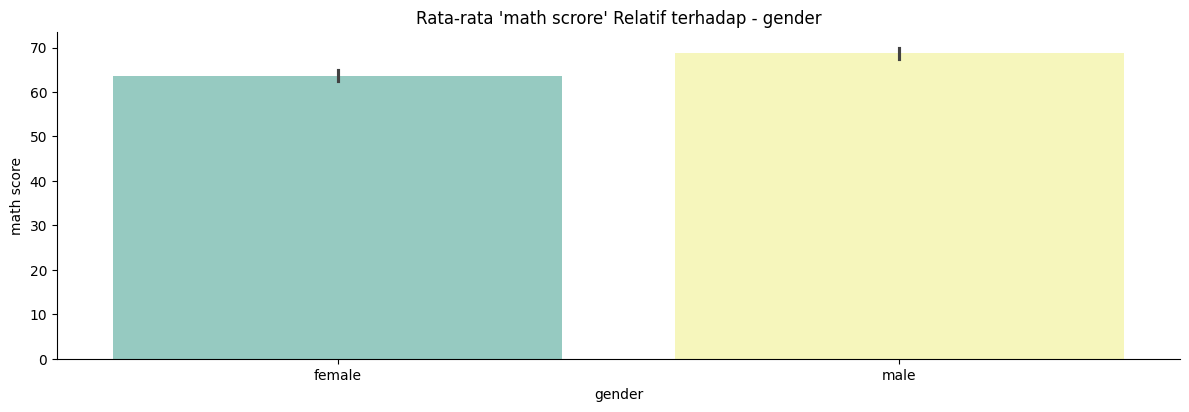

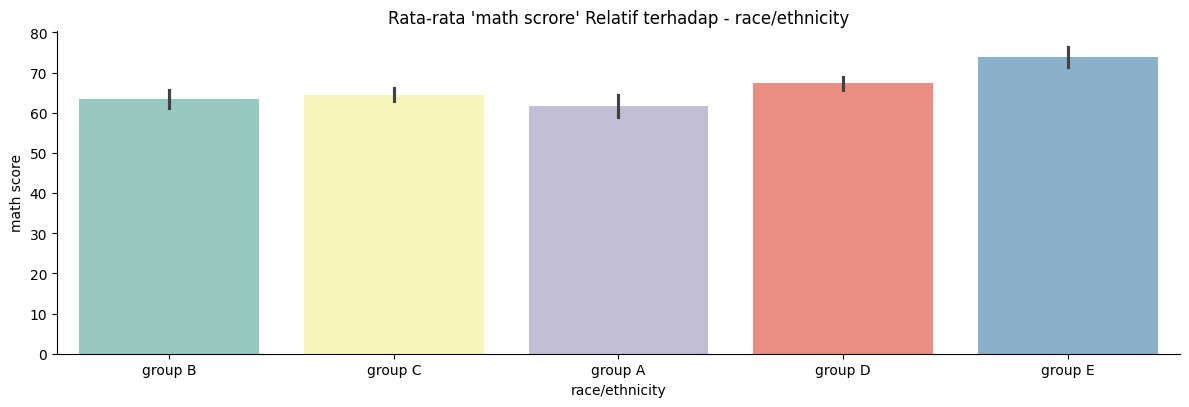

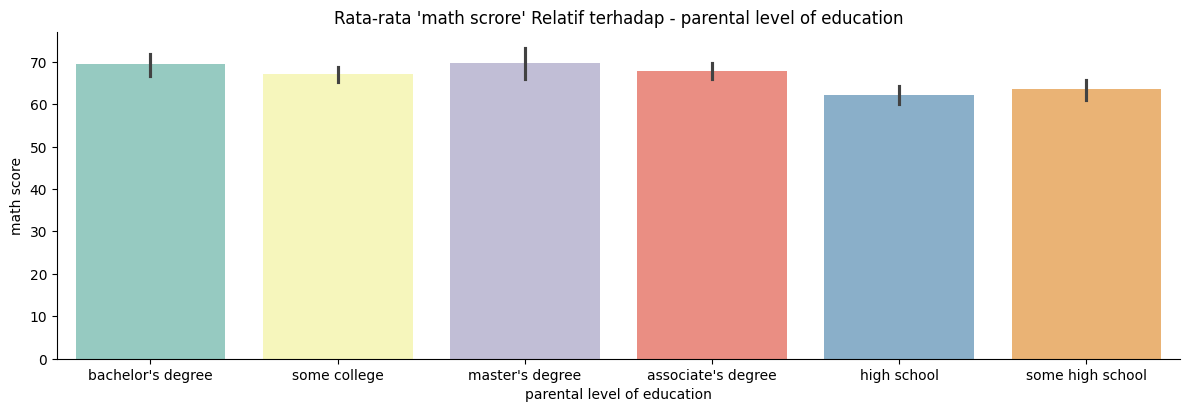

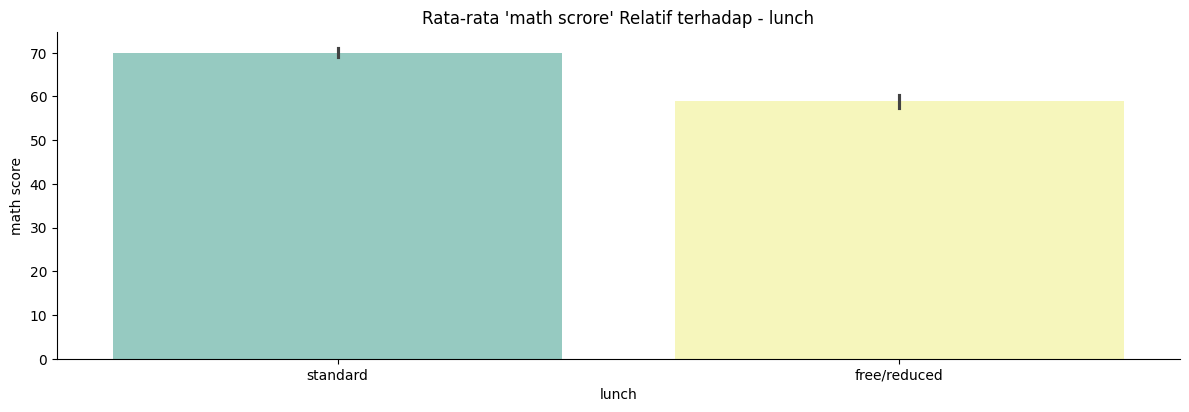

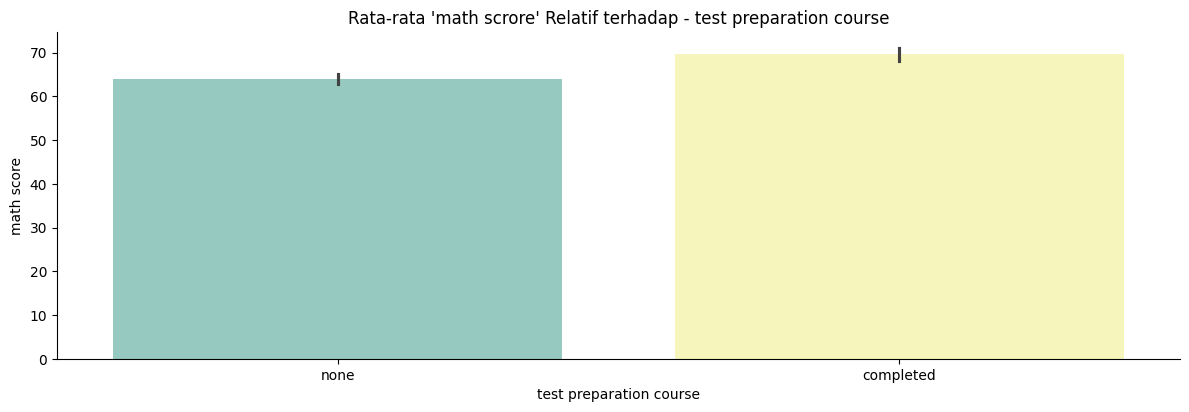

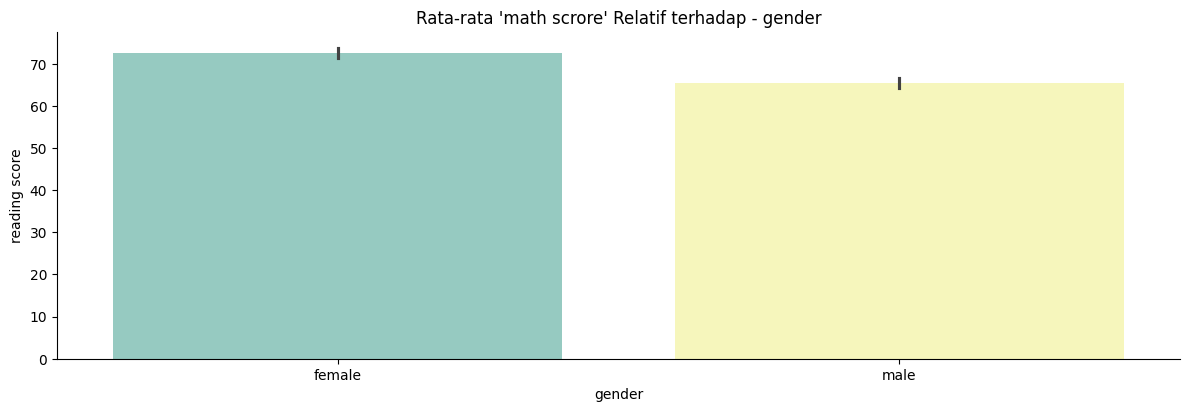

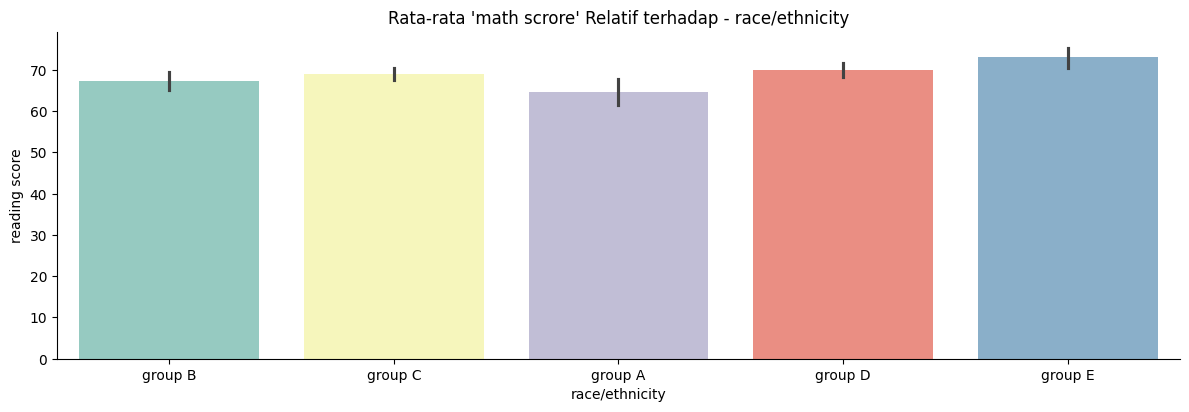

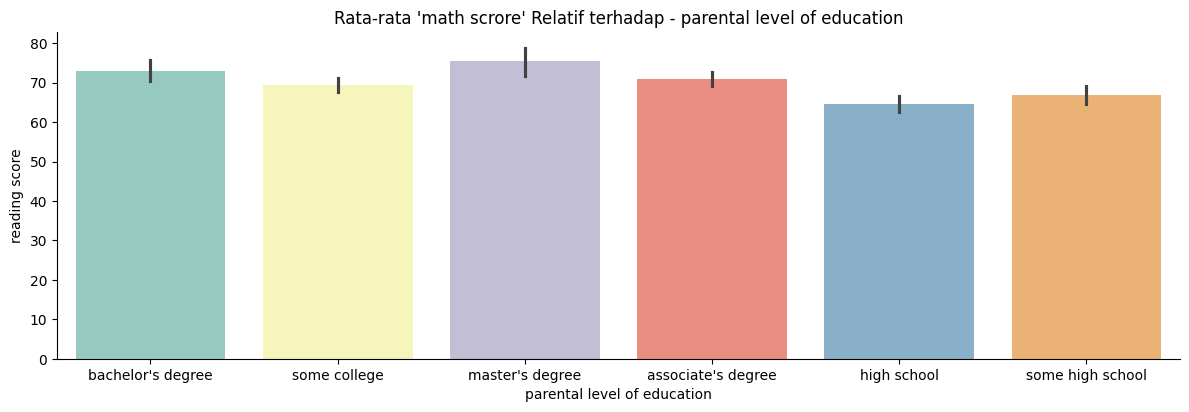

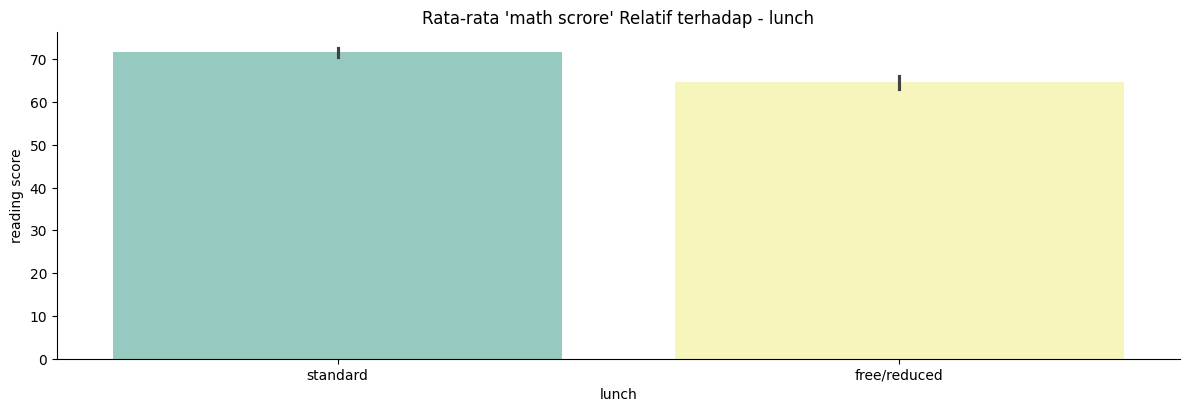

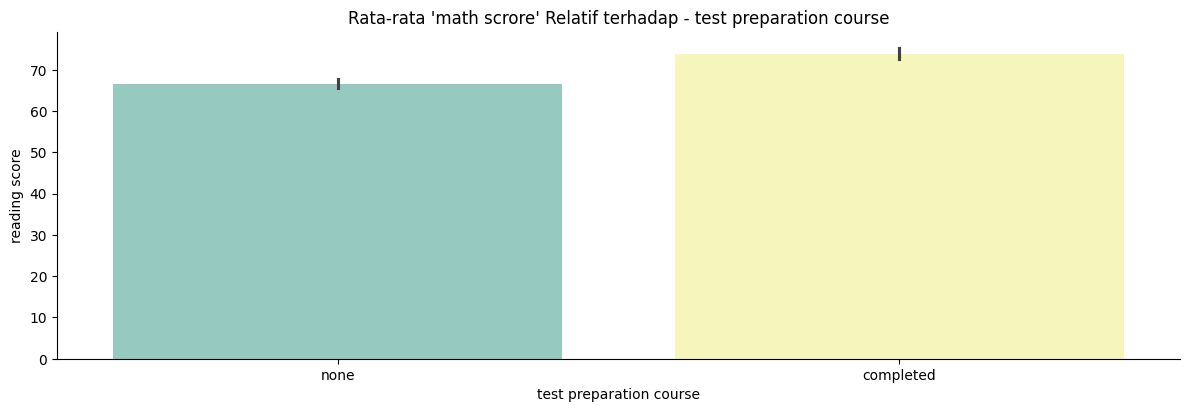

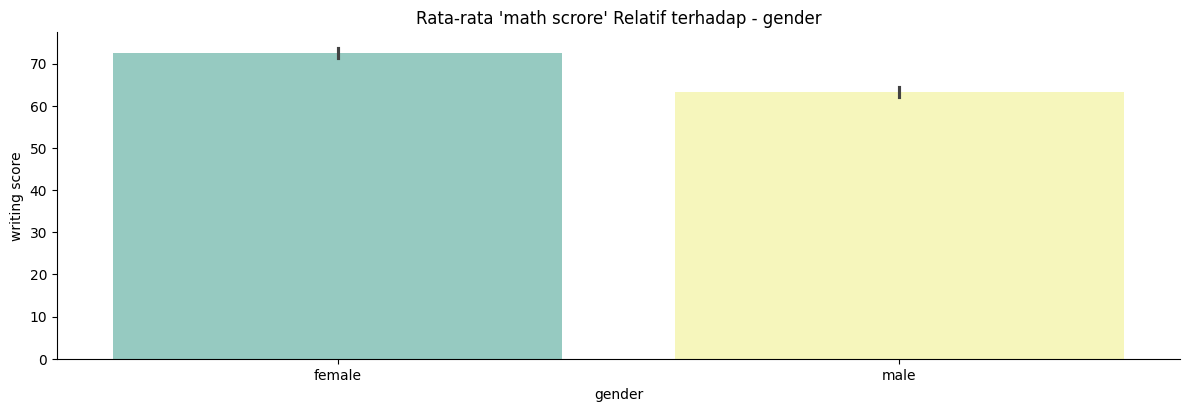

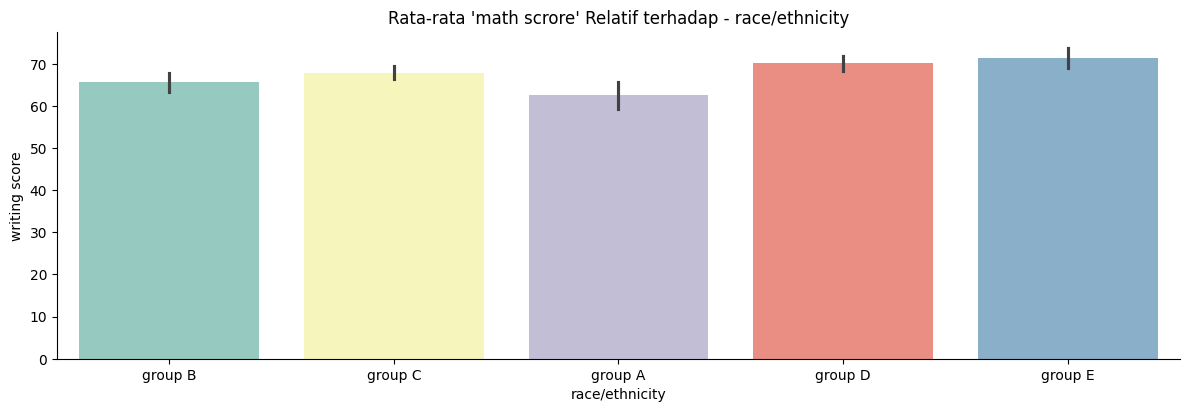

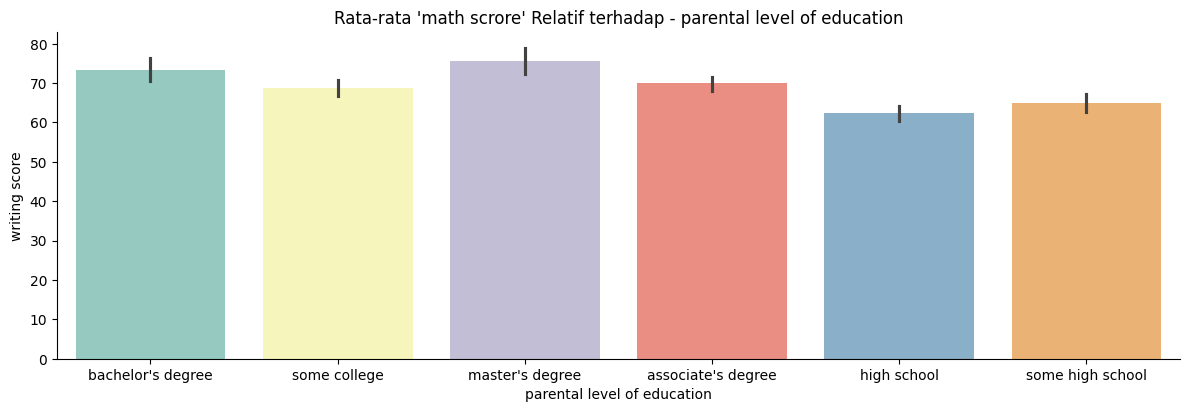

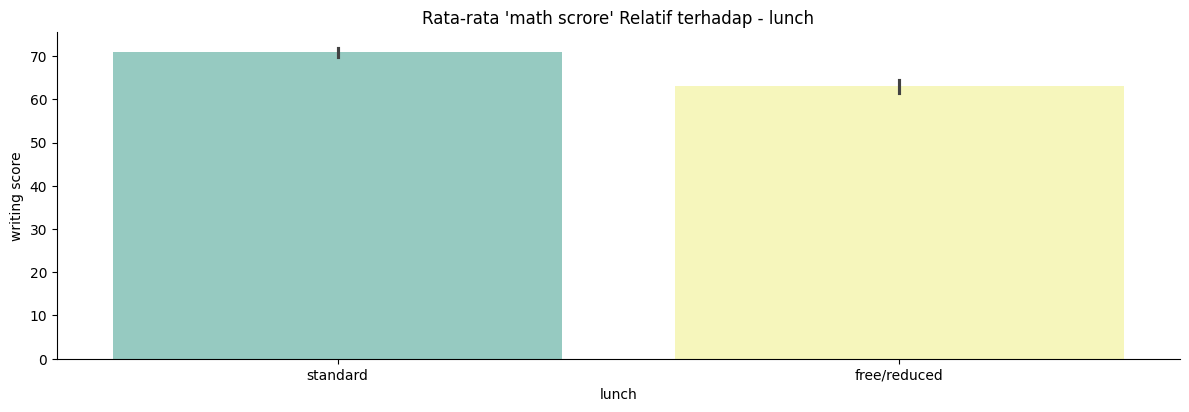

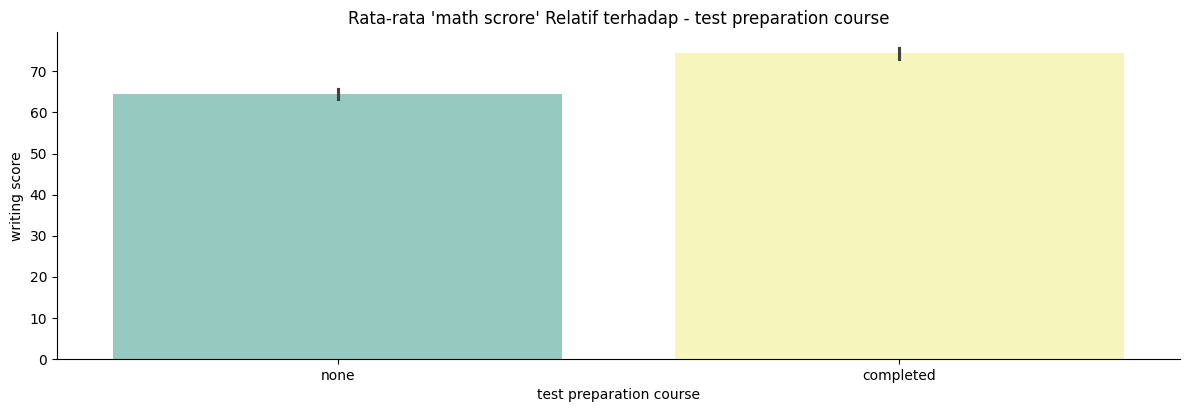

In [21]:
# Menentukan fitur kategorikal
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Loop untuk membuat plot untuk setiap kolom kategori
for col in categorical_features:
    sns.catplot(x=col, y='math score', kind="bar", dodge=False, height=4, aspect=3, data=df, hue=col, palette="Set3", legend=False)
    plt.title("Rata-rata 'math scrore' Relatif terhadap - {}".format(col))
    plt.show()

# Loop untuk membuat plot untuk setiap kolom kategori
for col in categorical_features:
    sns.catplot(x=col, y='reading score', kind="bar", dodge=False, height=4, aspect=3, data=df, hue=col, palette="Set3", legend=False)
    plt.title("Rata-rata 'math scrore' Relatif terhadap - {}".format(col))
    plt.show()

# Loop untuk membuat plot untuk setiap kolom kategori
for col in categorical_features:
    sns.catplot(x=col, y='writing score', kind="bar", dodge=False, height=4, aspect=3, data=df, hue=col, palette="Set3", legend=False)
    plt.title("Rata-rata 'math scrore' Relatif terhadap - {}".format(col))
    plt.show()

**Numerical Features**

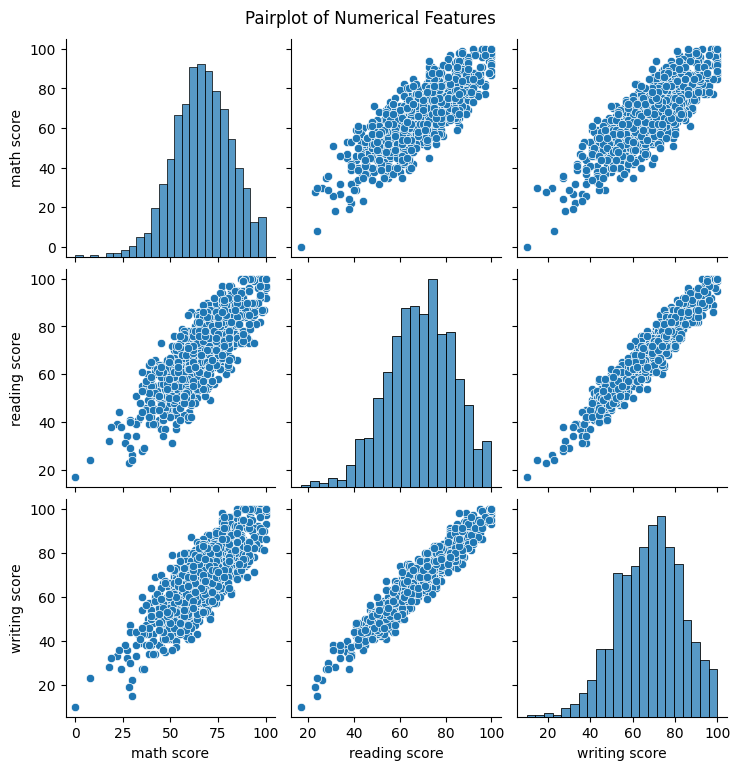

In [35]:
# Pairplot numerik
sns.pairplot(df[num_cols])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

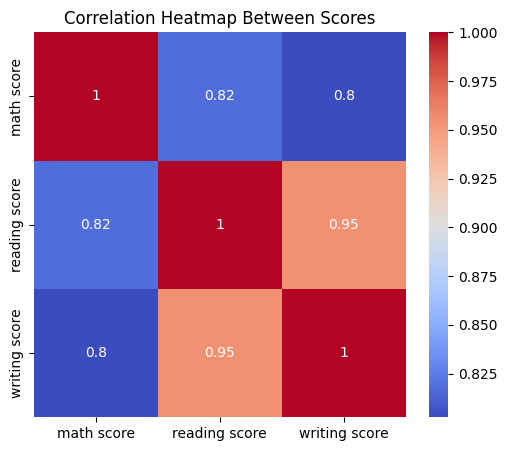

In [33]:
# Heatmap korelasi numerik
plt.figure(figsize=(6,5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Between Scores')
plt.show()

Analisis fitur numerik melalui pairplot dan heatmap menunjukkan bahwa skor siswa di mata pelajaran matematika, membaca, dan menulis sangat berkorelasi positif. Hal ini mengindikasikan bahwa performa siswa di satu bidang studi cenderung mencerminkan performa mereka di bidang studi lainnya. Tidak ada tanda-tanda korelasi negatif yang signifikan antar fitur numerik ini.

# **Data Preparation**

Pada tahap Data Preparation ini, pertama-tama data yang duplikat dibuang agar tidak ada pengulangan informasi. Selanjutnya, outlier pada fitur numerik seperti (math score, reading score, writing score) diidentifikasi dan diatasi menggunakan metode IQR untuk menjaga kualitas data. Fitur kategorikal seperti (gender, race/ethnicity, parental level of education, lunch, test preparation course) diuubah menjadi variabel numerik dengan teknik one-hot encoding agar dapat diproses oleh model. Setelah itu, data dibagi menjadi data latih dan data uji untuk melatih dan menguji model secara terpisah. Fitur numerik yang ada kemudian distandarisasi menggunakan 'StandardScaler' agar memiliki skala yang seragam. Terakhir, statistik deskriptif pada data latih yang telah distandarisasi diperiksa guna memastikan bahwa data siap digunakan untuk analisis dan pemodelan lebih lanjut.

**Menghapus Data Duplikat**

In [36]:
# Menghapus data duplikat
df_cleaned = df.drop_duplicates()

# Menampilkan data setelah duplikat dihapus
print("Jumlah duplikasi setelah dihapus: ", df_cleaned.duplicated().sum())

Jumlah duplikasi setelah dihapus:  0


**Menangani Outliers**

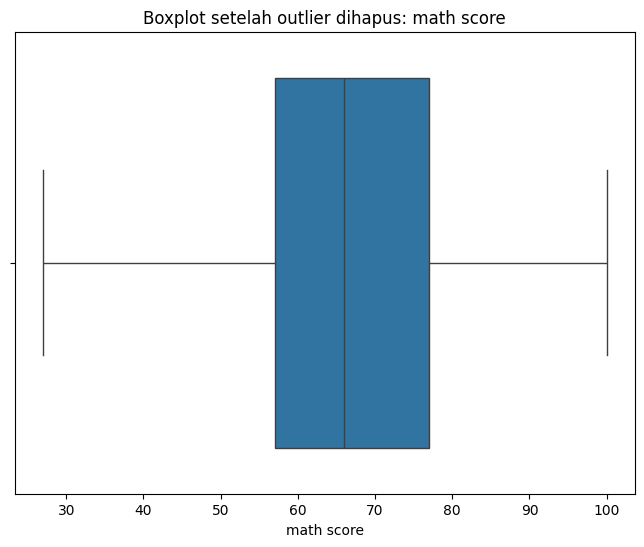

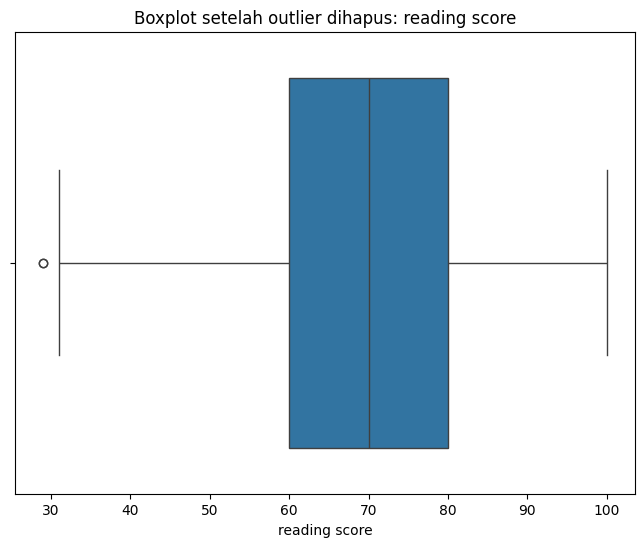

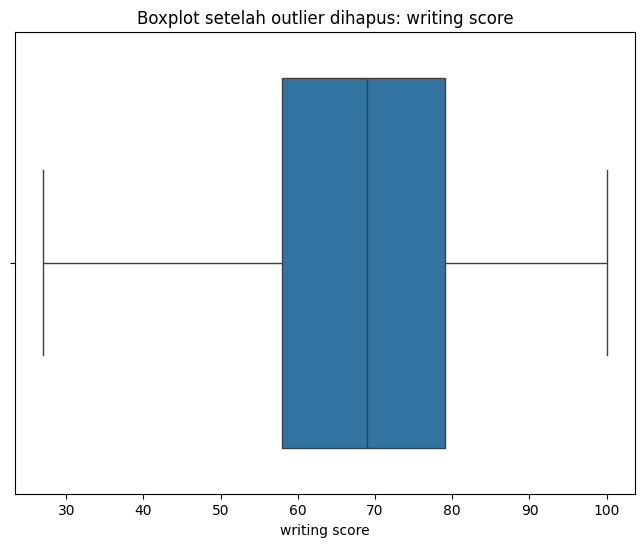

In [37]:
# Menghitung Q1 dan Q3 untuk setiap kolom numerik
numerical_features = df.select_dtypes(include=['number']).columns
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)

# Menghitung IQR dan menghapus outlier
IQR = Q3 - Q1
df = df[~((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Menampilkan boxplot setelah penanganan outlier
for column in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot setelah outlier dihapus: {column}')
    plt.show()

**Encoding Fitur Kategorikal**

In [50]:
# Pilih fitur numerik
num_cols = ['math score', 'reading score', 'writing score']

# Pilih fitur input (selain target, misalnya target = math score)
X = df.drop(columns=['math score'])  # Semua kolom kecuali 'math score'
y = df['math score']                 # Target: 'math score'

# Tampilkan sebagian hasil X dan y
print("Fitur (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

Fitur (X):
   reading score  writing score  gender_female  gender_male  \
0             72             74           True        False   
1             90             88           True        False   
2             95             93           True        False   
3             57             44          False         True   
4             78             75          False         True   

   race/ethnicity_group A  race/ethnicity_group B  race/ethnicity_group C  \
0                   False                    True                   False   
1                   False                   False                    True   
2                   False                    True                   False   
3                    True                   False                   False   
4                   False                   False                    True   

   race/ethnicity_group D  race/ethnicity_group E  \
0                   False                   False   
1                   False                

**Train-Test-Split**

In [55]:
# Bagi data menjadi train dan test set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Menampilkan jumlah data keseluruhan, data latih, dan data uji
print(f'Jumlah total sampel dalam dataset: {len(X)}')
print(f'Jumlah sampel pada data latih: {len(X_train)}')
print(f'Jumlah sampel pada data uji: {len(X_test)}')

Jumlah total sampel dalam dataset: 988
Jumlah sampel pada data latih: 790
Jumlah sampel pada data uji: 198


**Standarisasi**

In [60]:
# Buat objek scaler
scaler = StandardScaler()

# Identifikasi kolom numerik
numerical_features = ['reading score', 'writing score']

# Fit dan transform fitur numerik pada data latih
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Transform juga fitur numerik pada data uji
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Cek hasil
print("Fitur numerik setelah distandarisasi (X_train):")
print(X_train[num_cols].head())

Fitur numerik setelah distandarisasi (X_train):
     reading score  writing score
877      -0.665502      -1.055339
220      -0.164041       0.330380
299       1.197070       0.399666
50       -1.095327      -1.471055
890       1.053795       1.508242


In [61]:
# Menampilkan statistik deskriptif dari fitur numerik X_train setelah distandarisasi
X_train[numerical_features].describe().round(4)

,reading score,writing score
count,790.0000,790.0000
mean,-0.0000,-0.0000
std,1.0006,1.0006
min,-2.9579,-2.9261
25%,-0.6655,-0.7089
50%,0.0509,0.0532
75%,0.6956,0.6768
max,2.1284,2.1318


# **Model Development**

In [62]:
# Inisialisasi DataFrame untuk hasil evaluasi
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

**K-Nearest Neighbor**

In [83]:
# Membuat model prediksi KNN
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

**Random Forest**

In [82]:
# Membuat model prediksi Random forest
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

**Boosting**

In [71]:
# Membuat model boosting
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)

models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train) # Corrected x_train to X_train

# **Evaluasi Model**

Pada tahap evaluasi model ini, data uji terlebih dahulu diubah skalanya menggunakan scaler yang sama seperti pada data latih agar konsisten. Kemudian, performa model KNN, Random Forest, dan Boosting dinilai dengan menghitung Mean Squared Error (MSE) pada data uji. Nilai MSE dari ketiga model tersebut dibandingkan dan hasilnya divisualisasikan dalam bentuk diagram batang untuk memudahkan analisis perbandingan performa masing-masing model.

In [74]:
# Menggunakan scaler yang sudah dilatih untuk mentransformasi x_test
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Menampilkan beberapa baris pertama dari data x_test setelah transformasi
X_test[numerical_features].head()

,reading score,writing score
218,0.480696,0.053236
337,-1.381876,-1.817485
508,0.552333,0.538238
314,-0.450590,0.399666
91,-2.599712,-2.302487


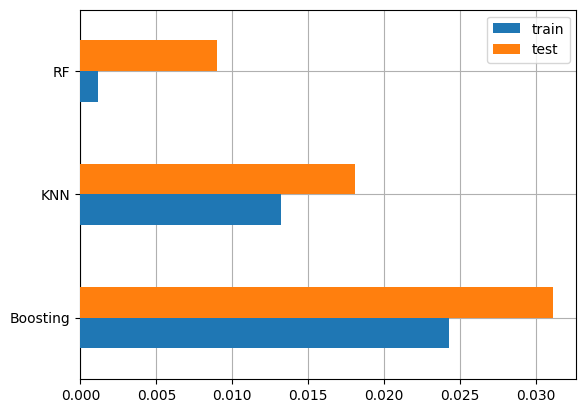

In [77]:
# Membuat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Membuat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    # Corrected the variable name from x_train to X_train
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    # Corrected the variable name from x_test to X_test
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [79]:
# Melihat hasil prediksi
# Corrected x_test to X_test to match the variable name from train_test_split
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}

# Melakukan prediksi dengan masing-masing model dan menyimpan hasilnya
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
218,66,70.7,69.6,74.9


# **Interpretasi Hasil dan Keterkaitan dengan Tujuan Bisnis**

## **Problem Statement 1**

Bagaimana data akademik dan latar belakang siswa dapat dimanfaatkan untuk mengembangkan sistem prediktif skor matematika sebagai dasar pengambilan keputusan strategis di lingkungan pendidikan?

**Goal 1**

Merancang sebuah model prediksi yang mampu mengestimasi nilai matematika siswa secara akurat, sehingga sekolah dapat memperoleh gambaran potensi siswa sejak awal dan melakukan tindak lanjut yang sesuai.

**Hasil & Analisis**

Tiga algoritma machine learning dievaluasi untuk membangun model prediksi, dengan hasil sebagai berikut:
- Random Forest memberikan performa terbaik dengan tingkat kesalahan prediksi paling rendah (MSE terendah).
- Boosting menunjukkan akurasi cukup baik, meskipun masih kalah dari Random Forest.
- KNN memiliki error paling tinggi, mengindikasikan performa yang kurang optimal.

Prediksi skor matematika dari masing-masing model terhadap nilai aktual 66:
- Random Forest: 69.6
- Boosting: 74.9
- KNN: 70.7

Jadi, Random Forest lebih mampu mengenali pola kompleks antar fitur, baik numerik maupun kategorikal, menjadikannya model paling andal dalam konteks prediksi skor matematika.

**Keterkaitan dengan Tujuan Pendidikan**

Implementasi model ini membuka peluang bagi sekolah untuk:
- Mengidentifikasi siswa yang membutuhkan perhatian khusus lebih awal, bahkan sebelum nilai resmi tersedia.
- Memberikan dukungan akademik yang lebih terarah, seperti program bimbingan belajar untuk siswa tertentu.
- Menerapkan pendekatan berbasis data dalam evaluasi siswa, meningkatkan efektivitas strategi pengajaran dan manajemen kelas.



## **Problem Statement 2**

Bagaimana memilih model prediksi terbaik untuk memperkirakan nilai matematika siswa berdasarkan perbandingan performa beberapa algoritma?

**Goal 2**

Menganalisis dan membandingkan kinerja dari model KNN, Boosting, dan Random Forest untuk menentukan model dengan akurasi tertinggi yang paling sesuai diterapkan di bidang pendidikan.

**Hasil & Analisis**

Penilaian dilakukan menggunakan metrik Mean Squared Error (MSE) sebagai indikator utama akurasi prediksi. Hasil menunjukkan:
- Random Forest paling akurat, dengan prediksi paling dekat terhadap nilai sebenarnya.
- Boosting sedikit overestimate namun masih dalam batas wajar.
- KNN gagal memodelkan data secara efektif, menghasilkan error tertinggi.

Secara keseluruhan, Random Forest memberikan hasil yang konsisten dan stabil dalam berbagai pengujian.

**Manfaat Strategis untuk Sekolah**

Dengan memilih Random Forest sebagai model utama, sekolah dapat:

- Mengantisipasi pencapaian akademik siswa dengan mengandalkan data awal tanpa menunggu hasil ujian.
- Mengelola sumber daya lebih efisien, karena bantuan akademik dapat difokuskan kepada siswa yang benar-benar membutuhkan.
- Menjadikan analitik prediktif sebagai fondasi kebijakan pendidikan yang proaktif dan responsif.





